# Read tiles

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd
import shapely

from src.utils import get_bounding_box_from_tile_name

In [6]:
tile_info = pd.read_csv('../data/tile-info/dop_nw.csv', sep=";", header=5)

# drop last column, since the CSV has a trailing separator in its header line
tile_info = tile_info.iloc[:,:-1]

In [7]:
tile_info.head()

,Kachelname,Erfassungsmethode,Aktualitaet,Bildflugnummer,Kamera_Sensor,Bodenpixelgroesse,Spektralkanaele,Koordinatenreferenzsystem_Lage,Koordinatenreferenzsystem_Hoehe,Bezugsflaeche,...,Anzahl_Spalten,Anzahl_Zeilen,Farbtiefe,Standardabweichung,Dateiformat,Hintergrund,Quelldatenqualitaet,Kompression,Komprimierung,Belaubungszustand
0,dop10rgbi_32_478_5740_1_nw_2024,0,2024-04-06,1427/24 Paderborn,DMCIII-27532_DMCIII,10,RGBI,25832,7837,bDOM,...,10000,10000,8,20,JPEG2000,0,1,1,"GDAL_JP2ECW, 90",1
1,dop10rgbi_32_478_5739_1_nw_2024,0,2024-04-06,1427/24 Paderborn,DMCIII-27532_DMCIII,10,RGBI,25832,7837,bDOM,...,10000,10000,8,20,JPEG2000,0,1,1,"GDAL_JP2ECW, 90",1
2,dop10rgbi_32_384_5620_1_nw_2023,0,2023-05-04,1405/23,UCEM3-431S41091X314298-f100_UCE-M3,10,RGBI,25832,7837,bDOM,...,10000,10000,8,20,JPEG2000,0,1,1,"GDAL_JP2ECW, 90",2
3,dop10rgbi_32_384_5619_1_nw_2023,0,2023-03-01,1404/23,DMCIII-27532_DMCIII,10,RGBI,25832,7837,bDOM,...,10000,10000,8,20,JPEG2000,0,1,1,"GDAL_JP2ECW, 90",1
4,dop10rgbi_32_416_5687_1_nw_2023,0,2023-05-27,1402/23 Iserlohn Attendorn,UCEM3-431S71678X911005-f100_UCE-M3,10,RGBI,25832,7837,bDOM,...,10000,10000,8,20,JPEG2000,0,1,1,"GDAL_JP2ECW, 90",2


In [177]:
epsg_code = "EPSG:25832"  # ETRS89_UTM32

In [178]:
def bbox_to_polygon(tile_name: str) -> shapely.Polygon:
    bbox_extent = get_bounding_box_from_tile_name(tile_name)
    return shapely.box(*bbox_extent)


tile_info["geometry"] = tile_info["Kachelname"].map(bbox_to_polygon)

In [179]:
tile_info = gpd.GeoDataFrame(tile_info, crs=epsg_code)

In [180]:
tile_info.head()

,Kachelname,Aktualitaet,Erfassungsmethode,Fortfuehrung,Fortfuehrungsmethode,Aufloesung,Koordinatenreferenzsystem_Lage,Koordinatenreferenzsystem_Hoehe,Hoehenanomalie,geometry
0,3dm_32_280_5652_1_nw,2022-02,5020,2022-02,5020,4.0,ETRS89_UTM32,DE_DHHN2016_NH,DE_AdV_GCG2016_QGH,"POLYGON ((281000 5652000, 281000 5653000, 2800..."
1,3dm_32_280_5653_1_nw,2022-02,5020,2022-02,5020,4.0,ETRS89_UTM32,DE_DHHN2016_NH,DE_AdV_GCG2016_QGH,"POLYGON ((281000 5653000, 281000 5654000, 2800..."
2,3dm_32_280_5654_1_nw,2022-02,5020,2022-02,5020,4.0,ETRS89_UTM32,DE_DHHN2016_NH,DE_AdV_GCG2016_QGH,"POLYGON ((281000 5654000, 281000 5655000, 2800..."
3,3dm_32_280_5655_1_nw,2022-02,5020,2022-02,5020,4.0,ETRS89_UTM32,DE_DHHN2016_NH,DE_AdV_GCG2016_QGH,"POLYGON ((281000 5655000, 281000 5656000, 2800..."
4,3dm_32_280_5656_1_nw,2022-02,5020,2022-02,5020,4.0,ETRS89_UTM32,DE_DHHN2016_NH,DE_AdV_GCG2016_QGH,"POLYGON ((281000 5656000, 281000 5657000, 2800..."


In [181]:
tile_info_wgs84 = tile_info.to_crs("EPSG:4326")

In [182]:
tile_info_wgs84

,Kachelname,Aktualitaet,Erfassungsmethode,Fortfuehrung,Fortfuehrungsmethode,Aufloesung,Koordinatenreferenzsystem_Lage,Koordinatenreferenzsystem_Hoehe,Hoehenanomalie,geometry
0,3dm_32_280_5652_1_nw,2022-02,5020,2022-02,5020,4.0,ETRS89_UTM32,DE_DHHN2016_NH,DE_AdV_GCG2016_QGH,"POLYGON ((5.88015 50.97789, 5.87955 50.98686, ..."
1,3dm_32_280_5653_1_nw,2022-02,5020,2022-02,5020,4.0,ETRS89_UTM32,DE_DHHN2016_NH,DE_AdV_GCG2016_QGH,"POLYGON ((5.87955 50.98686, 5.87895 50.99584, ..."
2,3dm_32_280_5654_1_nw,2022-02,5020,2022-02,5020,4.0,ETRS89_UTM32,DE_DHHN2016_NH,DE_AdV_GCG2016_QGH,"POLYGON ((5.87895 50.99584, 5.87835 51.00482, ..."
3,3dm_32_280_5655_1_nw,2022-02,5020,2022-02,5020,4.0,ETRS89_UTM32,DE_DHHN2016_NH,DE_AdV_GCG2016_QGH,"POLYGON ((5.87835 51.00482, 5.87774 51.0138, 5..."
4,3dm_32_280_5656_1_nw,2022-02,5020,2022-02,5020,4.0,ETRS89_UTM32,DE_DHHN2016_NH,DE_AdV_GCG2016_QGH,"POLYGON ((5.87774 51.0138, 5.87714 51.02278, 5..."
...,...,...,...,...,...,...,...,...,...,...
35855,3dm_32_531_5741_1_nw,2022-12,5020,2022-12,5020,4.0,ETRS89_UTM32,DE_DHHN2016_NH,DE_AdV_GCG2016_QGH,"POLYGON ((9.46426 51.81892, 9.46435 51.82791, ..."
35856,3dm_32_531_5742_1_nw,2022-12,5020,2022-12,5020,4.0,ETRS89_UTM32,DE_DHHN2016_NH,DE_AdV_GCG2016_QGH,"POLYGON ((9.46435 51.82791, 9.46444 51.8369, 9..."
35857,3dm_32_531_5743_1_nw,2022-12,5020,2022-12,5020,4.0,ETRS89_UTM32,DE_DHHN2016_NH,DE_AdV_GCG2016_QGH,"POLYGON ((9.46444 51.8369, 9.46454 51.84589, 9..."
35858,3dm_32_531_5744_1_nw,2022-12,5020,2022-12,5020,4.0,ETRS89_UTM32,DE_DHHN2016_NH,DE_AdV_GCG2016_QGH,"POLYGON ((9.46454 51.84589, 9.46463 51.85488, ..."


In [183]:
tile_info_wgs84.iloc[0].geometry.exterior.xy

(array('d', [5.880154468040246, 5.879552020405848, 5.865326157958554, 5.865931341159785, 5.880154468040246]),
 array('d', [50.97788566466176, 50.98686484752804, 50.98648363218287, 50.977504570649344, 50.97788566466176]))

In [184]:
tile_info.iloc[0].geometry.exterior.xy

(array('d', [281000.0, 281000.0, 280000.0, 280000.0, 281000.0]),
 array('d', [5652000.0, 5653000.0, 5653000.0, 5652000.0, 5652000.0]))

In [185]:
nodes = pd.DataFrame()

In [186]:
import osmnx as ox
import geopandas as gpd

In [187]:
bbox = 6.468161,51.463295,6.474540,51.466055

In [188]:
# Fetch buildings
buildings = ox.features_from_bbox(bbox, tags={"building": True})

In [189]:
buildings

geometry  \
element id                                                             
way     237806049  POLYGON ((6.4732 51.46512, 6.473 51.46504, 6.4...   
        329022461  POLYGON ((6.47168 51.4658, 6.47179 51.46584, 6...   
        329022462  POLYGON ((6.47151 51.46585, 6.47144 51.46596, ...   
        329022503  POLYGON ((6.47179 51.46595, 6.47183 51.46596, ...   
        329022546  POLYGON ((6.4719 51.46572, 6.4721 51.4658, 6.4...   
...                                                              ...   
        527867603  POLYGON ((6.47014 51.46531, 6.47024 51.46534, ...   
        527867604  POLYGON ((6.46983 51.46583, 6.46987 51.46591, ...   
        527883072  POLYGON ((6.47415 51.46417, 6.47424 51.46421, ...   
        527883073  POLYGON ((6.47424 51.46421, 6.47428 51.46423, ...   
        527883075  POLYGON ((6.47441 51.46428, 6.47431 51.46423, ...   

                  addr:city addr:country addr:housenumber addr:postcode  \
element id                                                                
way     237806049   Rheurdt           DE                8         47509   
        329022461       NaN          NaN              NaN           NaN   
        329022462       NaN          NaN              NaN           NaN   
        329022503       NaN          NaN              NaN           NaN   
        329022546   Rheurdt           DE                4         47509   
...                     ...          ...              ...           ...   
        527867603       NaN          NaN              NaN           NaN   
        527867604       NaN          NaN              NaN           NaN   
        527883072       NaN          NaN              NaN           NaN   
        527883073       NaN          NaN              NaN           NaN   
        527883075       NaN          NaN              NaN           NaN   

                  addr:street building disused               old_name amenity  \
element id                                                                      
way     237806049     Hochend      yes     yes  Netto Marken-Discount     NaN   
        329022461         NaN      yes     NaN                    NaN     NaN   
        329022462         NaN      yes     NaN                    NaN     NaN   
        329022503         NaN      yes     NaN                    NaN     NaN   
        329022546  Bahnstraße      yes     NaN                    NaN     NaN   
...                       ...      ...     ...                    ...     ...   
        527867603         NaN      yes     NaN                    NaN     NaN   
        527867604         NaN      yes     NaN                    NaN     NaN   
        527883072         NaN      yes     NaN                    NaN     NaN   
        527883073         NaN      yes     NaN                    NaN     NaN   
        527883075         NaN      yes     NaN                    NaN     NaN   

                  building:levels cuisine name opening_hours roof:levels  \
element id                                                                 
way     237806049             NaN     NaN  NaN           NaN         NaN   
        329022461             NaN     NaN  NaN           NaN         NaN   
        329022462             NaN     NaN  NaN           NaN         NaN   
        329022503             NaN     NaN  NaN           NaN         NaN   
        329022546             NaN     NaN  NaN           NaN         NaN   
...                           ...     ...  ...           ...         ...   
        527867603             NaN     NaN  NaN           NaN         NaN   
        527867604             NaN     NaN  NaN           NaN         NaN   
        527883072             NaN     NaN  NaN           NaN         NaN   
        527883073             NaN     NaN  NaN           NaN         NaN   
        527883075             NaN     NaN  NaN           NaN         NaN   

                  roof:shape wheelchair  
element id                               
way     237806049   

In [190]:
buildings_with_address = buildings[buildings["addr:street"].notnull()]
buildings_with_address

geometry  \
element id                                                             
way     237806049  POLYGON ((6.4732 51.46512, 6.473 51.46504, 6.4...   
        329022546  POLYGON ((6.4719 51.46572, 6.4721 51.4658, 6.4...   
        329022562  POLYGON ((6.47158 51.46576, 6.47168 51.4658, 6...   
        416103219  POLYGON ((6.47176 51.46546, 6.4717 51.46552, 6...   
        416103222  POLYGON ((6.47107 51.46602, 6.47103 51.46606, ...   
...                                                              ...   
        513404457  POLYGON ((6.4729 51.46319, 6.47277 51.46315, 6...   
        513404458  POLYGON ((6.47286 51.46333, 6.4731 51.46341, 6...   
        513404459  POLYGON ((6.4733 51.46334, 6.47335 51.46339, 6...   
        513404470  POLYGON ((6.4736 51.46329, 6.47369 51.46331, 6...   
        513404471  POLYGON ((6.47369 51.46331, 6.47377 51.46333, ...   

                  addr:city addr:country addr:housenumber addr:postcode  \
element id                                                                
way     237806049   Rheurdt           DE                8         47509   
        329022546   Rheurdt           DE                4         47509   
        329022562   Rheurdt           DE                2         47509   
        416103219   Rheurdt           DE                1         47509   
        416103222   Rheurdt           DE               13         47509   
...                     ...          ...              ...           ...   
        513404457   Rheurdt          NaN                6         47509   
        513404458   Rheurdt          NaN                8         47509   
        513404459   Rheurdt          NaN               10         47509   
        513404470   Rheurdt          NaN               17         47509   
        513404471   Rheurdt          NaN               19         47509   

                     addr:street    building disused               old_name  \
element id                                                                    
way     237806049        Hochend         yes     yes  Netto Marken-Discount   
        329022546     Bahnstraße         yes     NaN                    NaN   
        329022562  Rathausstraße      retail     NaN                    NaN   
        416103219     Bahnstraße         yes     NaN                    NaN   
        416103222  Rathausstraße  apartments     NaN                    NaN   
...                          ...         ...     ...                    ...   
        513404457     Fliederweg         yes     NaN                    NaN   
        513404458     Fliederweg         yes     NaN                    NaN   
        513404459     Fliederweg         yes     NaN                    NaN   
        513404470     Fliederweg         yes     NaN                    NaN   
        513404471     Fliederweg         yes     NaN                    NaN   

                      amenity building:levels   cuisine      name  \
element id                                                          
way     237806049         NaN             NaN       NaN       NaN   
        329022546         NaN             NaN       NaN       NaN   
        329022562  restaurant               2  regional  Zur Post   
        416103219         NaN             NaN       NaN       NaN   
        416103222         NaN               2       NaN       NaN   
...                       ...             ...       ...       ...   
        513404457         NaN             NaN       NaN       NaN   
        513404458         NaN             NaN       NaN       NaN   
        513404459         NaN             NaN       NaN       NaN   
        513404470         NaN             NaN       NaN       NaN   
        513404471         NaN             NaN       NaN       NaN   

                                          opening_hours roof:levels  \
element id                                                            
way     237806049                                   NaN         NaN   
        

In [191]:
bbox_extent = get_bounding_box_from_tile_name("dop10rgbi_32_345_5715_1_nw_2021")
bbox_extent

(345000, 5715000, 346000, 5716000)

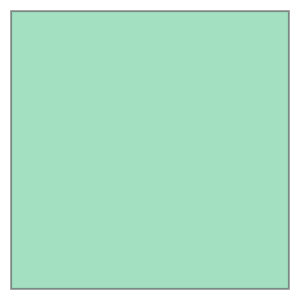

In [192]:
bbox_extent = shapely.box(*bbox_extent)
bbox_extent

In [193]:
import pyproj

In [194]:
transformer = pyproj.Transformer.from_crs("EPSG:25832", "EPSG:4326", always_xy=True)

def transform_geometry(geom) -> shapely.geometry.base.BaseGeometry:
    return shapely.ops.transform(transformer.transform, geom)

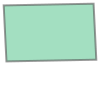

In [195]:
bbox_extent_wgs84 = transform_geometry(bbox_extent)
bbox_extent_wgs84

In [196]:
bbox_extent_wgs84.bounds

(6.763240830170676, 51.56474773413884, 6.7780980622112645, 51.57400653764645)

In [197]:
from src.utils import get_buildings_from_bbox

In [198]:
bbox_extent_wgs84.bounds

(6.763240830170676, 51.56474773413884, 6.7780980622112645, 51.57400653764645)

In [199]:
buildings_from_bbox = get_buildings_from_bbox(bbox_extent_wgs84.bounds)

In [200]:
from src.transform import transform_wgs84_to_utm32N_geometry

In [276]:
example_building_polygon = transform_wgs84_to_utm32N_geometry(buildings_from_bbox.iloc[105].geometry)

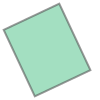

In [277]:
example_building_polygon

In [278]:
example_building_polygon.envelope.area

213.25838113144948

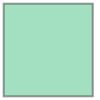

In [279]:
example_building_buffered_box = example_building_polygon.envelope.buffer(5, cap_style="flat", join_style="mitre")
example_building_buffered_box

In [280]:
example_building_buffered_box.bounds

(345517.1889922954, 5715522.312064558, 345541.31851508905, 5715547.4051702665)

In [281]:
import rasterio
from rasterio.plot import show

In [282]:
example_building_buffered_box.bounds

(345517.1889922954, 5715522.312064558, 345541.31851508905, 5715547.4051702665)

In [283]:
window = rasterio.windows.from_bounds(*example_building_buffered_box.bounds, transform=dataset.transform)

In [284]:
window

Window(col_off=np.float64(5171.889922954142), row_off=np.float64(4525.948297336698), width=np.float64(241.29522793646902), height=np.float64(250.9310570806265))

In [285]:
# Open JP2 file
file_path = "../data/dop10rgbi_32_345_5715_1_nw_2024.jp2"
with rasterio.open(file_path) as dataset:
    #image = dataset.read(1)  # Read first band
    # show(image)  # Display image
    print(dataset.bounds)
    print(dataset.width, dataset.height)
    print()

    subset = dataset.read(window=window)

BoundingBox(left=345000.0, bottom=5715000.0, right=346000.0, top=5716000.0)
10000 10000



In [286]:
dataset.transform

Affine(0.1, 0.0, 345000.0,
       0.0, -0.1, 5716000.0)

In [287]:
import matplotlib.pyplot as plt

In [288]:
subset.shape

(4, 251, 241)

In [289]:
import numpy as np


subset = np.moveaxis(subset, 0, -1)

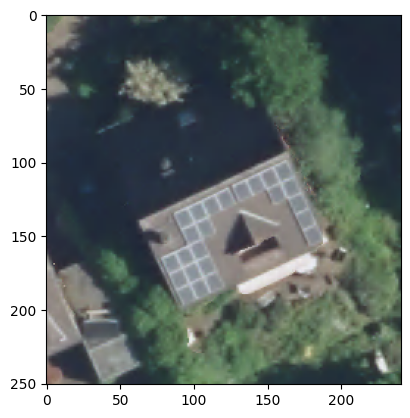

In [290]:
plt.figure()
plt.imshow(subset[:, :, :3])
plt.imsave("../data/example_roof.png", arr=subset[:, :, :3])